# In this project we will built this Support Vector Machine for classification (shown below) using scikit-learn to predict Loan_Status

## We will go through 4 tasks to implement our project:

Task 1: Importing libraries and Exploring the Dataset.

Task 2: Checking missing values.

Task 3: Creating visual methods to analyze the data.

Task 4: make Support vector machine classification model



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy.stats as stats

sns.set() #setting the default seaborn style for our plots
%matplotlib inline

In [2]:
#importing the dataset
loan_df=pd.read_csv("loan_data_set.csv")
#checking the head of the data
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Info about the data shape of data, type of individual columns

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Expected output:

1-The data should consist of 614 data record with 13 attributes. 8 Object, 4 float type .

2- there are missing data

In [4]:
loan_df.drop('Loan_ID',axis=1,inplace=True)
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


###  Task 2: Checking missing values 

In [5]:
loan_df.dropna(axis=0,inplace=True)

In [6]:
# check the missing data after removing the all NAN.
loan_df.isna().apply(pd.value_counts)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
False,480,480,480,480,480,480,480,480,480,480,480,480


### Task 3: analyze the data.

In [7]:
loan_df.describe() # make general statistic over view

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [8]:
#skewness 
skewness=pd.DataFrame({"skewness":[stats.skew(loan_df['ApplicantIncome']),stats.skew(loan_df['CoapplicantIncome']),stats.skew(loan_df['LoanAmount']),
                                   stats.skew(loan_df['Loan_Amount_Term']),stats.skew(loan_df['Credit_History'])]},index=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History' ])
skewness

,skewness
ApplicantIncome,6.895392
CoapplicantIncome,5.863226
LoanAmount,2.354051
Loan_Amount_Term,-2.326411
Credit_History,-2.006957


In [9]:
import pandas_profiling as pp

pp.ProfileReport(loan_df)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

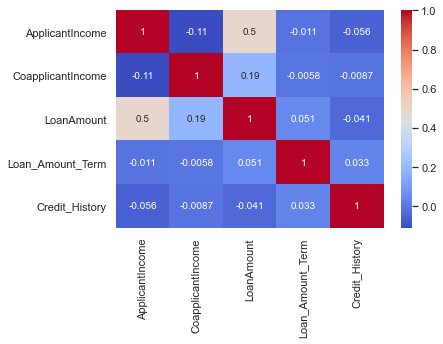

In [10]:
sns.heatmap(loan_df.corr(),cmap="coolwarm",annot=True)

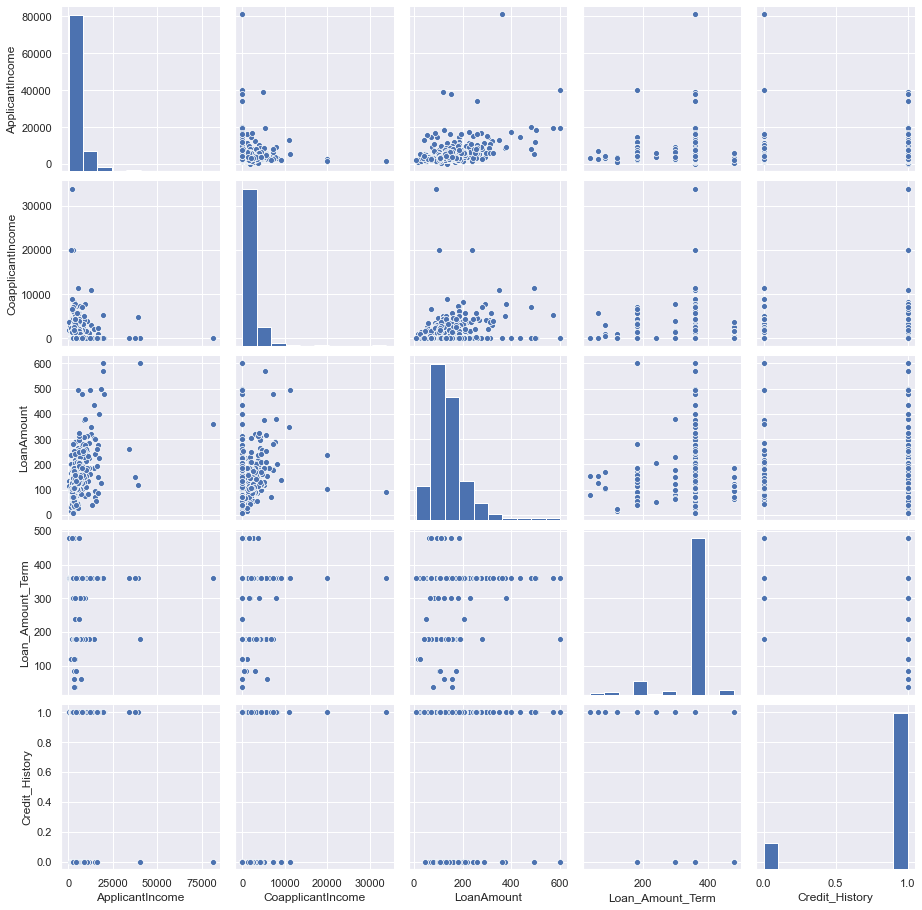

In [11]:
sns.pairplot(loan_df)  #pairplot

### Task 5: make different support vector machine classification kernals model and choose the best

In [12]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
loan_df['Credit_History'].unique()

array([1., 0.])

In [14]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_features = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 'Credit_History','Property_Area','Loan_Status']

In [16]:
for col in numerical_columns:
    loan_df[col] = pd.to_numeric(loan_df[col], errors='coerce')

In [17]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 68.8+ KB


In [18]:
for col in categorical_features:
    print(f'----------- {col} -----------')
    print(loan_df[col].unique())
    print('\n')

----------- Gender -----------
['Male' 'Female']


----------- Married -----------
['Yes' 'No']


----------- Dependents -----------
['1' '0' '2' '3+']


----------- Education -----------
['Graduate' 'Not Graduate']


----------- Self_Employed -----------
['No' 'Yes']


----------- Loan_Amount_Term -----------
[360. 120. 180.  60. 300. 480. 240.  36.  84.]


----------- Credit_History -----------
[1. 0.]


----------- Property_Area -----------
['Rural' 'Urban' 'Semiurban']


----------- Loan_Status -----------
['N' 'Y']




In [19]:
loan_df.shape

(480, 12)

In [20]:
numerical_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [21]:
df = pd.get_dummies(loan_df, columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
                                           'Loan_Amount_Term','Credit_History','Property_Area',], drop_first=True)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,...,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,N,1,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3000,0.0,66.0,Y,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,2583,2358.0,120.0,Y,1,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4,6000,0.0,141.0,Y,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
5,5417,4196.0,267.0,Y,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,Y,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
610,4106,0.0,40.0,Y,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
611,8072,240.0,253.0,Y,1,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
612,7583,0.0,187.0,Y,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [22]:
x = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler= StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,confusion_matrix

#### Build A Preliminary Support Vector Machine

In [28]:
clf=SVC(kernel='poly')
clf.fit(x_train,y_train)

SVC(kernel='poly')

In [29]:
y_pred=clf.predict(x_train)
print(accuracy_score(y_train,y_pred))

0.8527777777777777


####  Optimize Parameters with Cross Validation

In [30]:
for k in ('linear','poly','rbf','sigmoid'):
    clf=SVC(kernel=k)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_train)
    print(k)
    print(accuracy_score(y_train,y_pred))

linear
0.8222222222222222
poly
0.8527777777777777
rbf
0.8388888888888889
sigmoid
0.7916666666666666
